# All the President's Moods

During his tenure as US President, Donald Trump maintained a steady presence on Twitter. Since the words of the politicians tend to affect the behavior of other people, including markets, there is a sizable literature quantifying the effect of politician speeches on market behavior in the aggregate. 

Unllke other politicians, Trump's tweets were both impassioned and plentiful. This means Twitter can give a large volume of reactions to work with that have a distribution of "sentiment."

In this assignment:
1. (2 points) Load a json file of all the president's tweets from August 30 to November 5th. After loading them, put the following information into a dataframe:
    - The full text of the Tweet. (string)
    - Any users mentioned in the Tweet. (string)
    - The timestamp. (datetime)
    - The date (YYYY-MM-DD) of the Tweet. (date)
    - Retweets (numeric)
    - Favorites (numeric)
    - Whether the Tweet was censored, meaning zero retweets (binary/boolean).
    
   __Hint: list comprehensions can be your best friend!__
   
2. (2 points) Create a "clean_text" column by doing the following to "full_text":
    - removing links, which are strings that start with "http"
    - removing hashtags, which are strings that start with "#"
    - removing mentions, which are strings that start with "@"
    - converting text to lower case.
    - removing punctuation.
    
   Now report:
    - The top 10 most common words (omitting stop words).
    - The top 5 Twitter accounts that are mentioned.
    - The top 5 most liked ("favorited") tweets.
    - The top 5 hashtags (hint: use a regular expression).
3. (4 points) Graph the daily volme of tweets over time, while annotating any major events.
4. (6 points) Run the tweets through sentiment analysis, and report:
    - The 20 most "negative" and "positive" words.
    - A graph of the sentiment over time.
    
5. (6 points) Trump and the Stock Market
    - Read in the time series dataset of S&P 500 closing, daily prices. Then merge this data to Trump's daily sentiment scores. __Graph both of them (EXTRA CREDIT GRAPH)__, calculate their correlation, and interpret what you see.

    - Since Trump often comments on the stock market but the stock market may also react to his tweets, it is not clear how the causal relationship should work. Describe in detail how you would answer the question: "Did President Trump's tweet sentiment influence the stock market?" Specifically describe:
        - The data you would need in addition to these data sources.
        - The way you would read in the data and manipulate it.
        - The sort of analysis or statistics you would calculate to answer the question.
    

In [52]:
import pandas as pd
import json 
import matplotlib.pyplot as plt
import matplotlib
import re
import string
from nltk.corpus import stopwords
import regex
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Number 1

In [53]:
tweets_df = pd.read_json('/Users/isaacwerries/Desktop/test/Trump_tweets.json') #open json file
pd.set_option('display.max_columns', None) #show all columns

In [54]:
tweets_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,extended_entities,withheld_scope,withheld_copyright,withheld_in_countries
0,2020-11-05 15:37:40+00:00,1324375334653988864,1324375334653988864,Fmr NV AG Laxalt: ‘No Question‘ Trump Would Ha...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,27745,124472,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-11-05 15:09:19+00:00,1324368202139357186,1324368202139357184,ANY VOTE THAT CAME IN AFTER ELECTION DAY WILL ...,False,"[0, 61]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-11-05 14:12:37+00:00,1324353932022480896,1324353932022480896,STOP THE COUNT!,False,"[0, 15]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,120833,750449,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-11-05 00:01:07+00:00,1324139647111409667,1324139647111409664,"Detroit Absentee Ballot Counting Chaos, Blocke...",False,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,71580,249948,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-11-05 00:00:05+00:00,1324139387546984449,1324139387546984448,Demands Arise for PA Attorney General to ‘Step...,False,"[0, 96]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,44496,172668,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013,2020-09-23 02:28:39+00:00,1308594096005697541,1308594096005697536,Our GREAT RALLY tonight in Pennsylvania. Treme...,False,"[0, 65]","{'hashtags': [{'text': 'MAGA', 'indices': [60,...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,39427,183462,False,False,0.0,en,NaN,NaN,NaN,NaN,"{'media': [{'id': 1308594089575821313, 'id_str...",NaN,NaN,NaN
3014,2020-09-23 01:43:48+00:00,1308582808181329922,1308582808181329920,"With your VOTE, we are going to lift our natio...",False,"[0, 267]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,18921,65614,False,False,0.0,en,NaN,NaN,NaN,NaN,"{'media': [{'id': 1308582783946616833, 'id_str...",NaN,NaN,NaN
3015,2020-09-23 01:30:28+00:00,1308579452100599808,1308579452100599808,I did more in 47 months than Joe Biden did in ...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,27660,129266,False,False,0.0,en,NaN,NaN,NaN,NaN,"{'media': [{'id': 1308555064722763777, 'id_str...",NaN,NaN,NaN
3016,2020-09-23 01:30:02+00:00,1308579343333900288,1308579343333900288,https://t.co

In [55]:
mod_df = tweets_df.loc[:,('full_text','entities','retweet_count','favorite_count')]
mod_df['censored'] = tweets_df['retweet_count'] == 0
mod_df['timestamp'] = tweets_df['created_at']
mod_df['date'] = tweets_df['created_at'].dt.strftime('%Y-%m-%d')

In [56]:
mod_df.head(5)

,full_text,entities,retweet_count,favorite_count,censored,timestamp,date
0,Fmr NV AG Laxalt: ‘No Question‘ Trump Would Ha...,"{'hashtags': [], 'symbols': [], 'user_mentions...",27745,124472,False,2020-11-05 15:37:40+00:00,2020-11-05
1,ANY VOTE THAT CAME IN AFTER ELECTION DAY WILL ...,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0,True,2020-11-05 15:09:19+00:00,2020-11-05
2,STOP THE COUNT!,"{'hashtags': [], 'symbols': [], 'user_mentions...",120833,750449,False,2020-11-05 14:12:37+00:00,2020-11-05
3,"Detroit Absentee Ballot Counting Chaos, Blocke...","{'hashtags': [], 'symbols': [], 'user_mentions...",71580,249948,False,2020-11-05 00:01:07+00:00,2020-11-05
4,Demands Arise for PA Attorney General to ‘Step...,"{'hashtags': [], 'symbols': [], 'user_mentions...",44496,172668,False,2020-11-05 00:00:05+00:00,2020-11-05


In [57]:
print(mod_df.dtypes)

full_text                      object
entities                       object
retweet_count                   int64
favorite_count                  int64
censored                         bool
timestamp         datetime64[ns, UTC]
date                           object
dtype: object


# Number 2

In [84]:
mod_df['clean_text'] = mod_df['full_text'].str.lower() #convert to lowercase
mod_df['clean_text'] = [re.sub(r'@\w+',"",x) for x in mod_df['clean_text']] #remove all @
mod_df['clean_text'] = [re.sub(r'#\w+',"",x) for x in mod_df['clean_text']] #remove all hashtags
mod_df['clean_text'] = [re.sub(r'http\S+',"",x) for x in mod_df['clean_text']] #remove all links
mod_df['clean_text'] = [re.sub(r'[^\w\s]',"",x) for x in mod_df['clean_text']] #remove punctuation
mod_df['clean_text'] = [re.sub(r'\n'," ",x) for x in mod_df['clean_text']]
mod_df['clean_text'] = mod_df['clean_text'].str.rstrip()
mod_df = mod_df.drop_duplicates(subset = ['clean_text'], keep = 'first') #remove diplicates
mod_df = mod_df[mod_df['clean_text'] != ''] #remove blanks

In [85]:
mod_df.full_text[18]

'Get out &amp; VOTE! Under my Administration, our ECONOMY is growing at the fastest rate EVER at 33.1%. Next year will be the GREATEST ECONOMIC YEAR in American History!\n\nFind your polling place below. https://t.co/OODmll3Snt'

In [86]:
mod_df.clean_text[18]

'get out amp vote under my administration our economy is growing at the fastest rate ever at 331 next year will be the greatest economic year in american history  find your polling place below'

In [87]:
mod_df

,full_text,entities,retweet_count,favorite_count,censored,timestamp,date,clean_text
0,Fmr NV AG Laxalt: ‘No Question‘ Trump Would Ha...,"{'hashtags': [], 'symbols': [], 'user_mentions...",27745,124472,False,2020-11-05 15:37:40+00:00,2020-11-05,fmr nv ag laxalt no question trump would have ...
1,ANY VOTE THAT CAME IN AFTER ELECTION DAY WILL ...,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0,True,2020-11-05 15:09:19+00:00,2020-11-05,any vote that came in after election day will ...
2,STOP THE COUNT!,"{'hashtags': [], 'symbols': [], 'user_mentions...",120833,750449,False,2020-11-05 14:12:37+00:00,2020-11-05,stop the count
3,"Detroit Absentee Ballot Counting Chaos, Blocke...","{'hashtags': [], 'symbols': [], 'user_mentions...",71580,249948,False,2020-11-05 00:01:07+00:00,2020-11-05,detroit absentee ballot counting chaos blocked...
4,Demands Arise for PA Attorney General to ‘Step...,"{'hashtags': [], 'symbols': [], 'user_mentions...",44496,172668,False,2020-11-05 00:00:05+00:00,2020-11-05,demands arise for pa attorney general to step ...
...,...,...,...,...,...,...,...,...
1784,GREAT PATRIOTS! https://t.co/BWGxVoBTmI,"{'hashtags': [], 'symbols': [], 'user_mentions...",28849,139909,False,2020-08-30 10:37:39+00:00,2020-08-30,great patriots
1785,Disgraceful Anarchists. We are watching them c...,"{'hashtags': [], 'symbols': [], 'user_mentions...",20520,68859,False,2020-08-30 10:36:14+00:00,2020-08-30,disgraceful anarchists we are watching them cl...
1786,Democrat “Leadership” has no clue. Request hel...,"{'hashtags': [], 'symbols': [], 'user_mentions...",10607,33582,False,2020-08-30 10:31:53+00:00,2020-08-30,democrat leadership has no clue request help n...
1787,ANTIFA is a Radical Left group that only wants...,"{'hashtags': [], 'symbols': [{'text': 'FOOLS',...",22742,65156,False,2020-08-30 10:28:46+00:00,2020-08-30,antifa is a radical left group that only wants...


In [31]:
words = str(clean_text) #turning the list into a continuous string
words = words.split(" ") # split by whitespace
stopwords = list(stopwords)+["''", "'"]
words = [x for x in words if x not in stopwords]
pd.Series(words).value_counts().head(10)

',        1248
          1235
'',        539
biden      447
great      370
amp        362
vote       339
joe        273
'thank     228
get        210
dtype: int64

AttributeError: 'list' object has no attribute 'words'

# Number 3

In [ ]:
daily_vol = mod_df.groupby('date').count()
daily_vol

In [ ]:
daily_vol['clean_text'].plot(x='date', figsize = (25,5), kind='bar')
plt.ylabel('# of Tweets')

In [ ]:
red = mod_df['date'].count() >= 100
blue = mod_df['date'].count() < 100

In [ ]:
col = []
for val in daily_vol['clean_text']:
    if val < 100:
        col.append('blue')
    else:
        col.append('red')

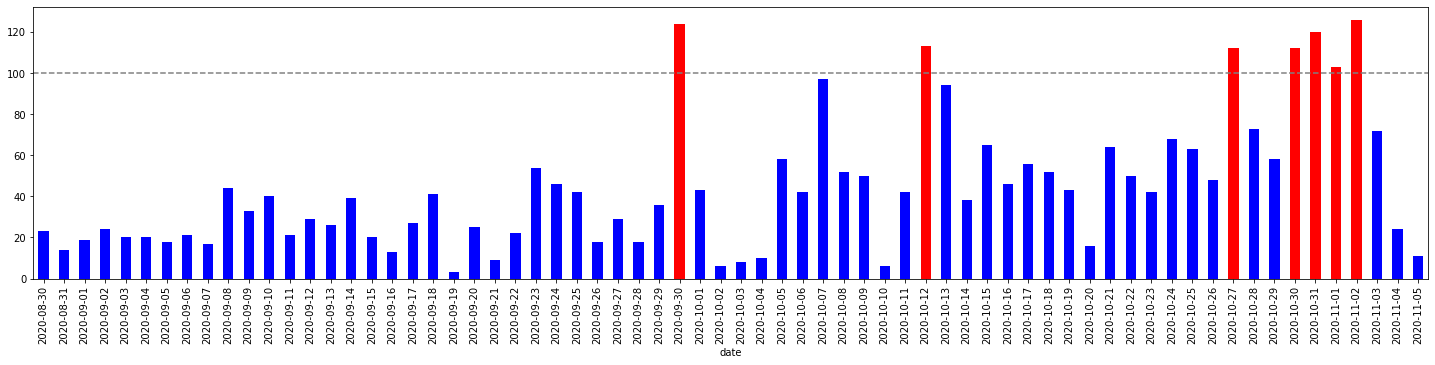

In [53]:
daily_vol['clean_text'].plot(x='date', figsize = (25,5), kind='bar', color=col)
plt.axhline(y=100, color='grey', linestyle = 'dashed' )